In [43]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mochrekihadiyanto","key":"e579a7e8a07552e3c8ba8e313371eb1b"}'}

In [44]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [45]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
!unzip diabetes-prediction-dataset.zip -d diabetes_prediction
!ls diabetes_prediction

Archive:  diabetes-prediction-dataset.zip
replace diabetes_prediction/diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction/diabetes_prediction_dataset.csv  
diabetes_prediction_dataset.csv


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv("diabetes_prediction/diabetes_prediction_dataset.csv")

In [49]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [50]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<ipython-input-52-1317596ff266>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

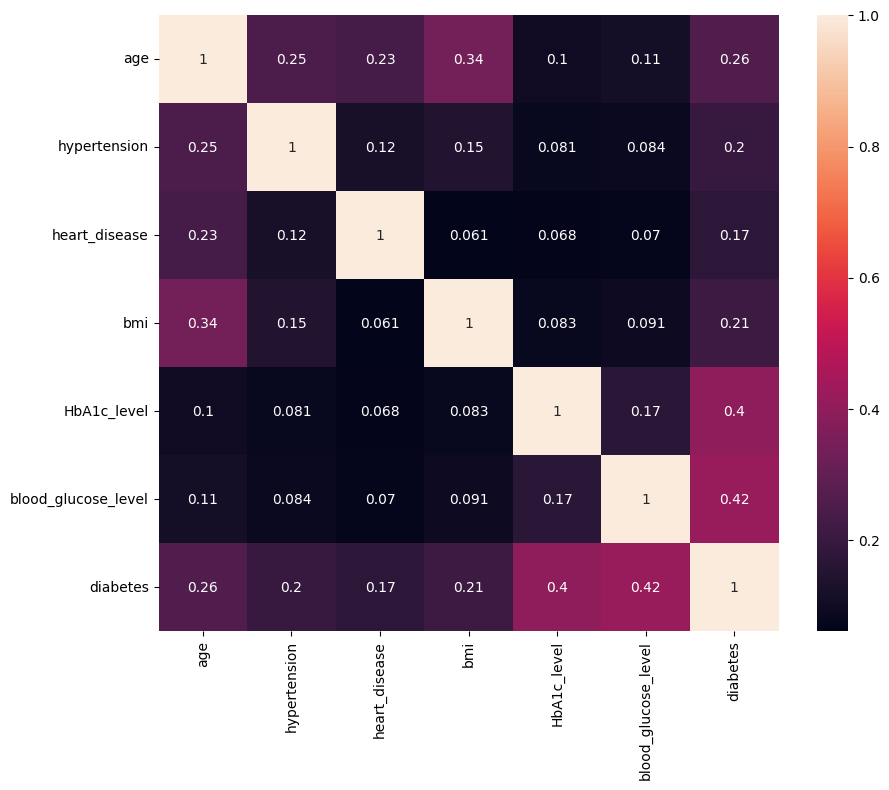

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

<Axes: >

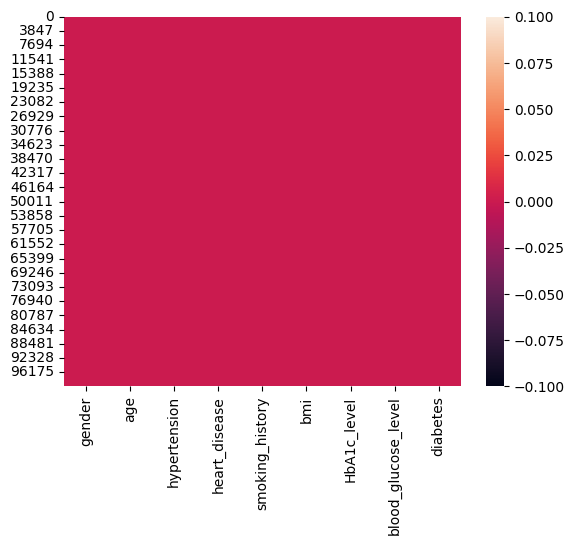

In [53]:
sns.heatmap(data.isnull())

In [54]:
data[data.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [55]:
data.drop_duplicates(inplace=True)

In [56]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [58]:
pd.unique(data.smoking_history)

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [59]:
pd.unique(data.gender)

array(['Female', 'Male', 'Other'], dtype=object)

In [60]:
def change_string_to_int(column):
    variables=pd.unique(data[column])
    for item in range(variables.size):
        data[column]=[item if each==variables[item] else each for each in data[column]]
    return data[column]

In [61]:
data["gender"]=change_string_to_int("gender")

In [62]:
data["smoking_history"]=change_string_to_int("smoking_history")

In [63]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


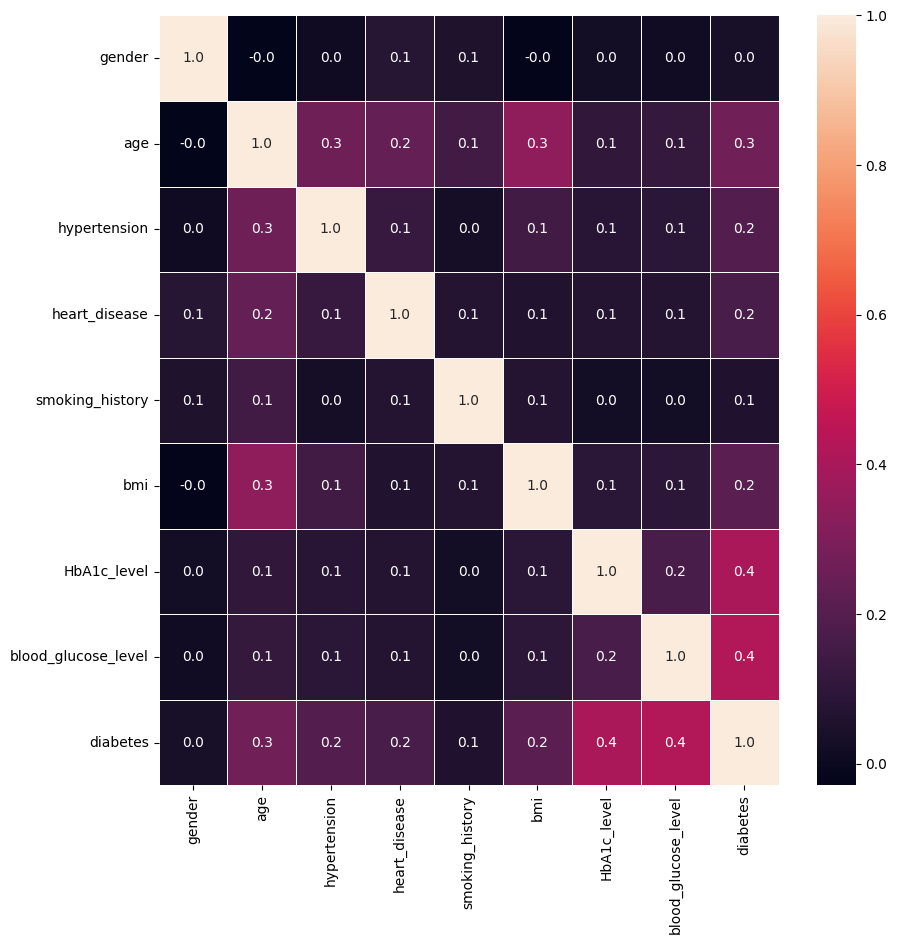

In [64]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

In [65]:
data.drop("gender",axis=1,inplace=True)

In [66]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


In [67]:
data.describe()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,1.320960,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,1.473466,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [68]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


In [69]:
x = data.drop("diabetes",axis=1)
y = data.diabetes

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [72]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [73]:
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200,)
print("test accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(logreg.fit(x_train, y_train).score(x_train, y_train)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 0.9585702399112467 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.958931383911325 


In [74]:
y_pred = logreg.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


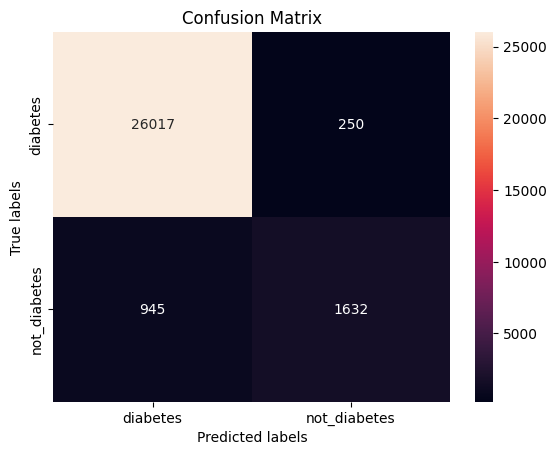

In [75]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

In [76]:
data = np.array([[80, 0, 1, 0, 25.19, 6.6, 140]])
print(logreg.predict(data))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
import pickle
filename = "prediksi_diabetes.sav"
pickle.dump(logreg,open(filename,'wb'))